In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.datasets import make_moons

In [60]:
x ,y=make_moons(n_samples=1000,noise=0.24)

In [62]:
x[:,0]

array([ 1.12843102e+00,  1.88426227e+00,  1.74992197e-01,  5.27111034e-01,
        1.71760445e+00,  4.82335404e-01,  1.91002066e-01,  1.26636984e+00,
       -1.81743968e-01,  2.96095819e-01, -4.44879157e-01,  3.56207746e-02,
        5.59208825e-01, -6.85204514e-01, -7.77724336e-02, -1.07996799e-01,
        9.72470110e-02, -7.86252008e-01,  7.89805374e-01,  1.83345948e+00,
       -3.06588376e-02, -6.49761208e-01,  1.99084117e+00,  1.36124256e+00,
        1.54383698e-01, -8.94458577e-01,  1.23244959e+00,  5.29720884e-01,
        3.01428005e-01, -1.15000058e+00,  2.06587903e+00,  1.04990808e+00,
        1.04749500e+00,  9.67890784e-01,  1.20619032e+00,  1.07563428e+00,
        4.44652285e-01,  3.33884265e-01,  4.70257704e-01,  4.86018720e-01,
       -9.96387063e-01,  1.95206313e+00, -6.65612862e-01, -6.64545453e-01,
        5.07402923e-01,  1.28771478e+00, -1.09876783e+00,  5.83299795e-01,
       -8.05913201e-01,  5.69067746e-01, -2.86344596e-01, -3.57392136e-01,
       -1.67774678e-01, -

In [64]:
data={"x1":x[:,0],"x2":x[:,1],"y":y}

In [66]:
df=pd.DataFrame(data)

In [68]:
df

,x1,x2,y
0,1.128431,-0.438179,1
1,1.884262,0.342847,1
2,0.174992,0.344114,1
3,0.527111,0.124980,1
4,1.717604,-0.275772,1
...,...,...,...
995,0.468198,1.500118,0
996,0.502900,-0.355548,1
997,0.358452,0.628285,0
998,1.487214,-0.614653,1


<Axes: xlabel='x1', ylabel='x2'>

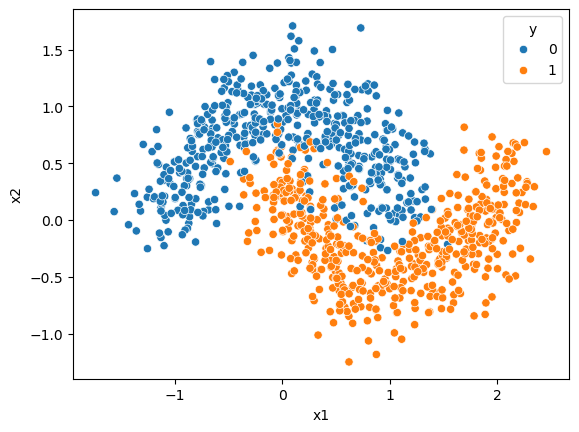

In [70]:
sns.scatterplot(x="x1",y="x2",data=df,hue="y")

In [72]:
from sklearn.model_selection import train_test_split


In [74]:
x=df.iloc[:,:-1]

In [76]:
y=df.iloc[:,-1]

In [88]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=43)

In [90]:
from sklearn.tree import DecisionTreeClassifier

In [92]:
from sklearn.svm import SVC

In [94]:
from sklearn.naive_bayes import GaussianNB

In [96]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_test,y_test)

0.932

In [100]:
sv=SVC()
sv.fit(x_train,y_train)
sv.score(x_test,y_test)

0.956

In [104]:
nb=GaussianNB()
nb.fit(x_train,y_train)
nb.score(x_test,y_test)

0.856

In [106]:
from sklearn.ensemble import VotingClassifier

In [120]:
data=[("dt1",DecisionTreeClassifier()),("sv1",SVC()),("nb1",GaussianNB())]

In [122]:
vc=VotingClassifier(data)

In [124]:
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('dt1', DecisionTreeClassifier()), ('sv1', SVC()),
                             ('nb1', GaussianNB())])

In [126]:
vc.score(x_test,y_test)

0.948

In [128]:
pred={"dtc":dtc.predict(x_test),"sv":sv.predict(x_test),"vc":vc.predict(x_test)}

In [130]:
pd.DataFrame(pred)

,dtc,sv,vc
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,1,1,1
...,...,...,...
245,0,0,0
246,0,0,0
247,1,1,1
248,0,0,0
